<a href="https://colab.research.google.com/github/hdk1729/MLandDS/blob/main/Caliornia_Housing_prediction_Lr_XG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT1: Caliornia Housing prediction project  -Linear regression

In [ ]:

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from IPython.utils.tempdir import TemporaryWorkingDirectory
from typing_extensions import dataclass_transform
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

x= housing.data
y= housing.target

data =pd.DataFrame(x, columns=housing.feature_names)
data["SalePrice"]=y
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print (housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalePrice   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
import  math
data['AveRooms']= data['AveRooms'].apply(lambda x:math.floor(x))
data['AveBedrms']= data['AveBedrms'].apply(lambda x:math.floor(x))
data['AveOccup']= data['AveOccup'].apply(lambda x:math.floor(x))

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6,1,322.0,2,37.88,-122.23,4.526
1,8.3014,21.0,6,0,2401.0,2,37.86,-122.22,3.585
2,7.2574,52.0,8,1,496.0,2,37.85,-122.24,3.521
3,5.6431,52.0,5,1,558.0,2,37.85,-122.25,3.413
4,3.8462,52.0,6,1,565.0,2,37.85,-122.25,3.422


EDA

In [ ]:

data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
SalePrice     0
dtype: int64

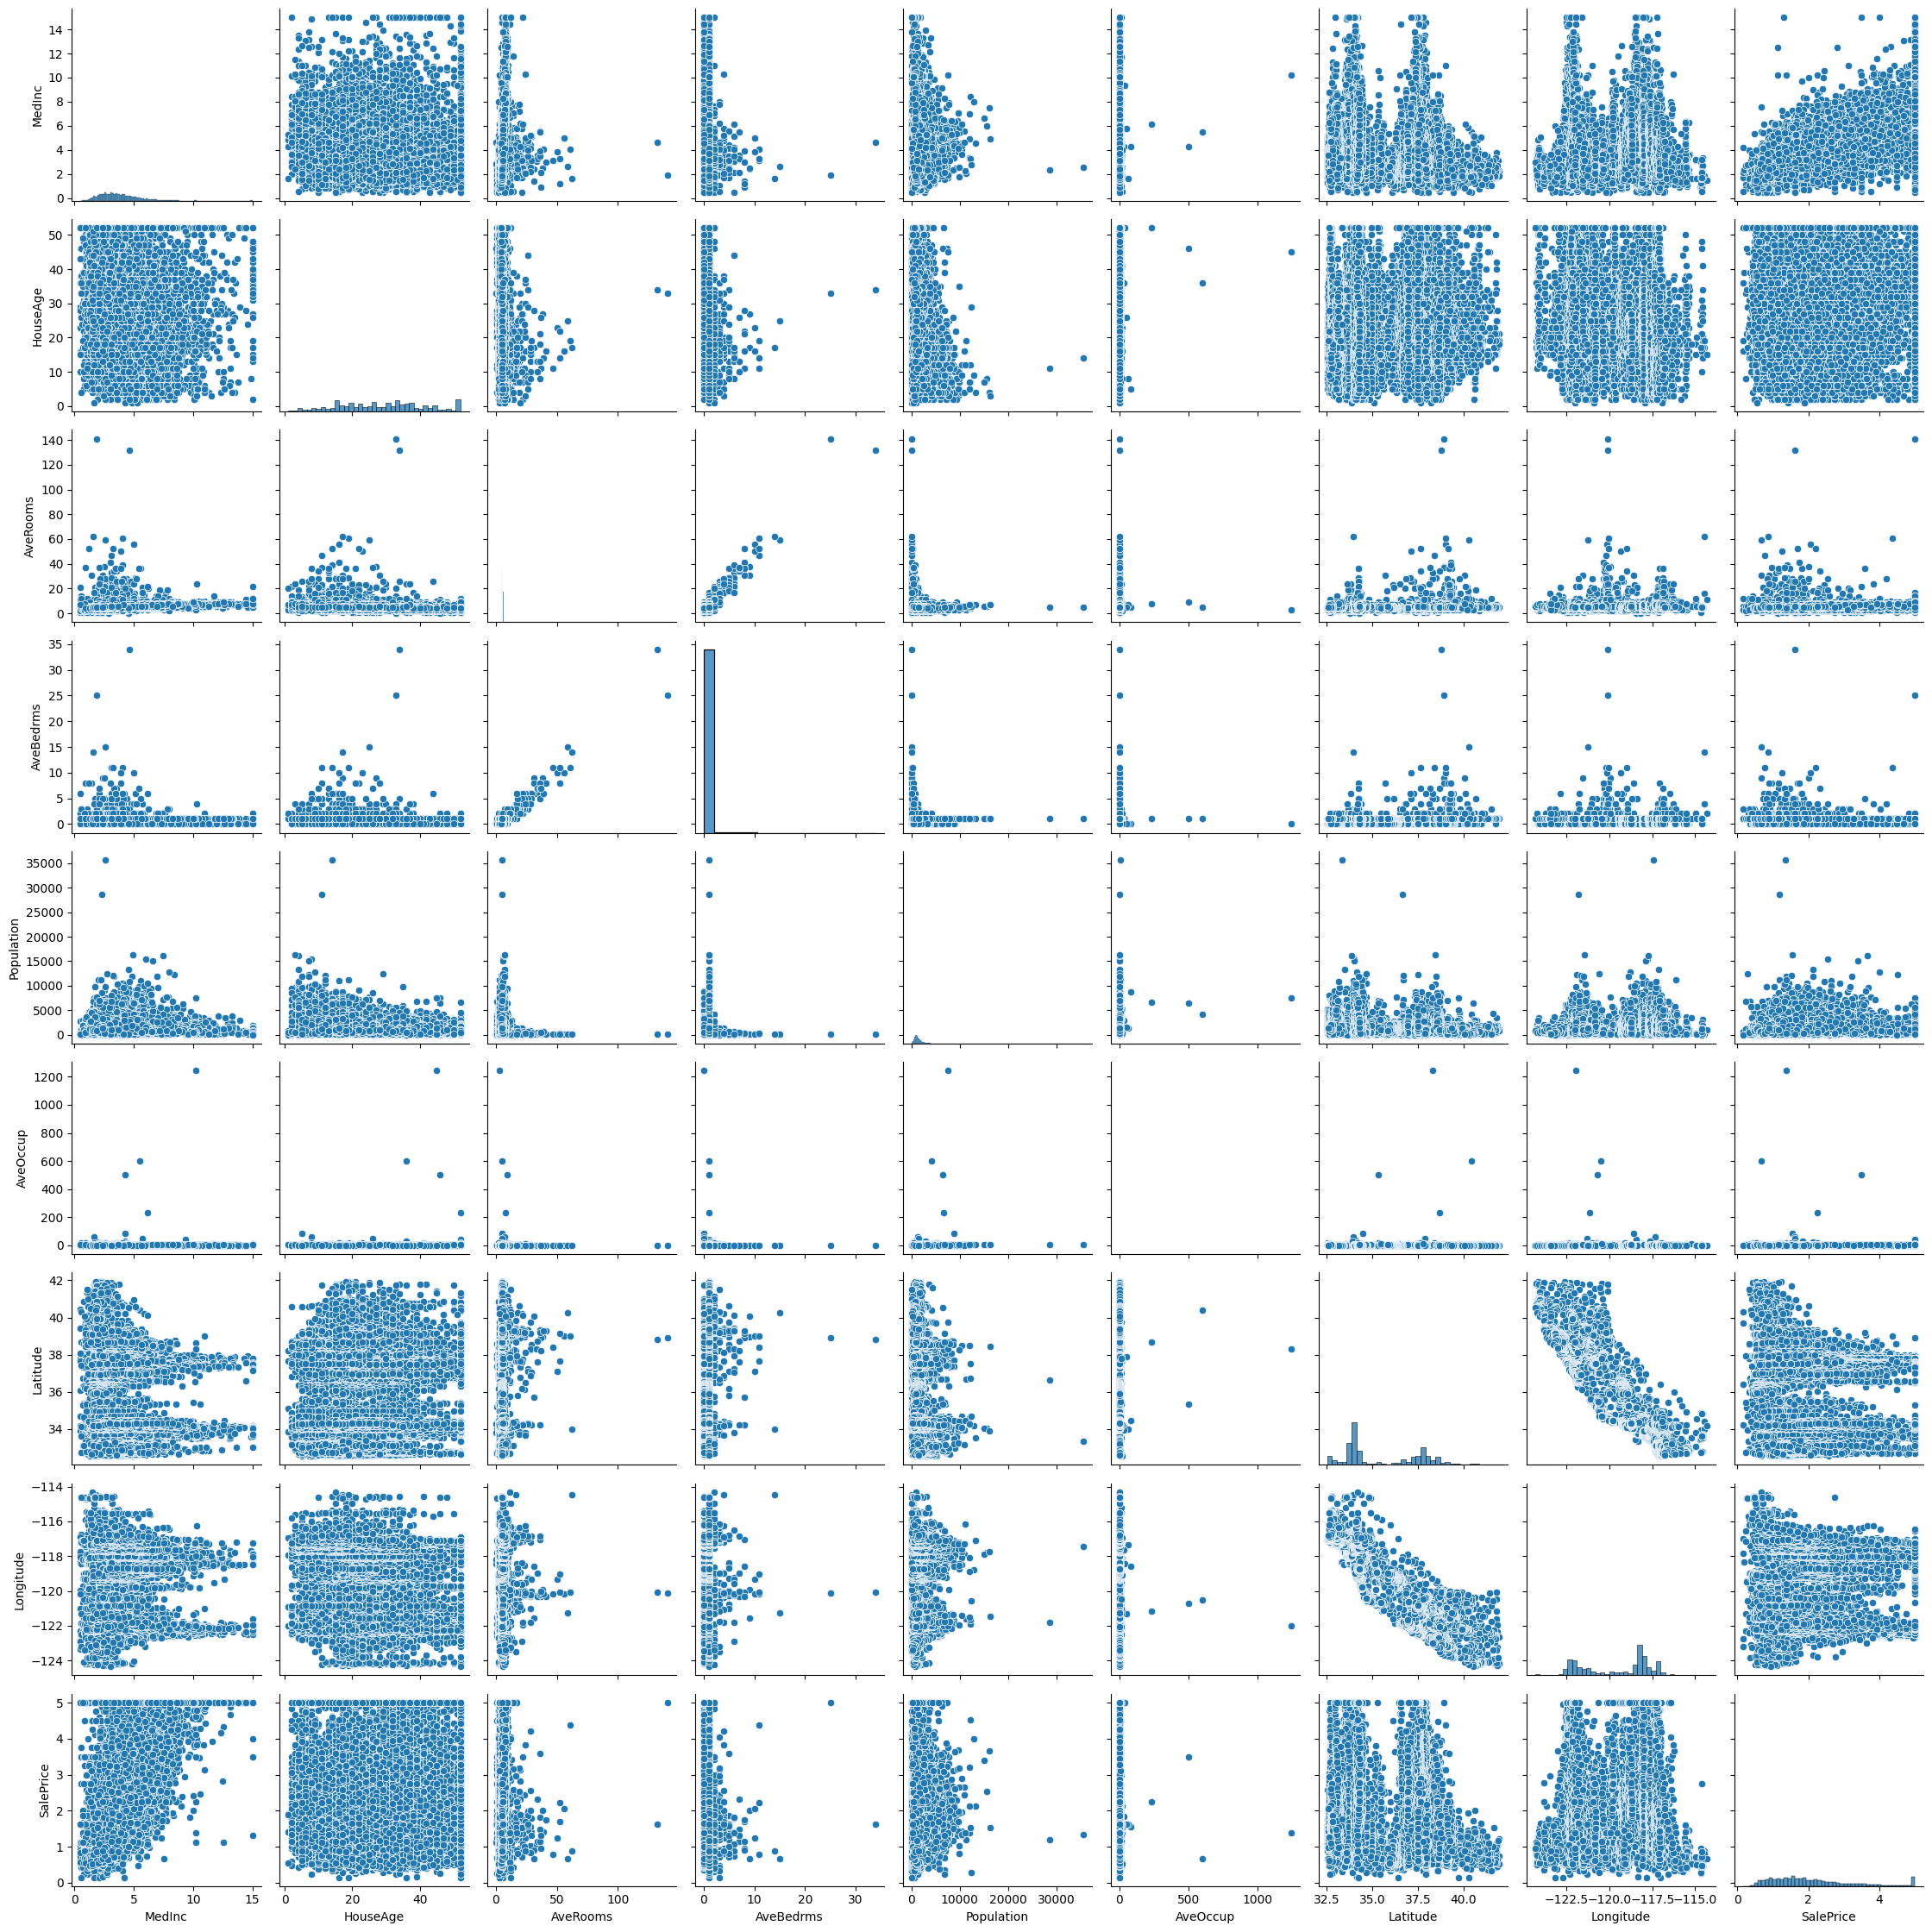

In [ ]:

sns.pairplot(data,height=2.5)
plt.tight_layout()

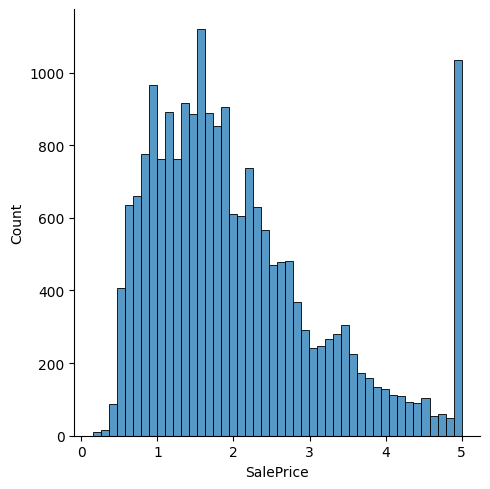

In [ ]:
sns.displot(data['SalePrice'])


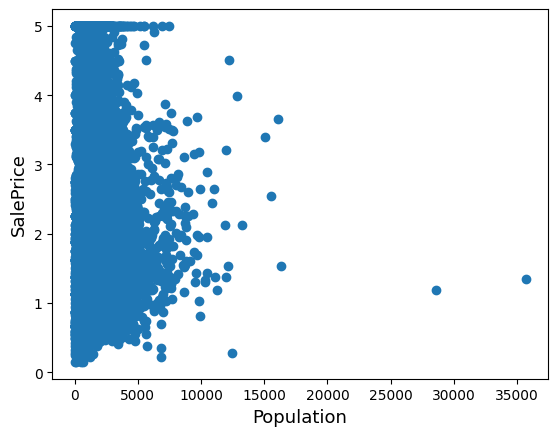

In [ ]:
fig, ax =plt.subplots()
ax.scatter(x=data['Population'],y= data['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('Population',fontsize=13)
plt.show()


data corrrelation


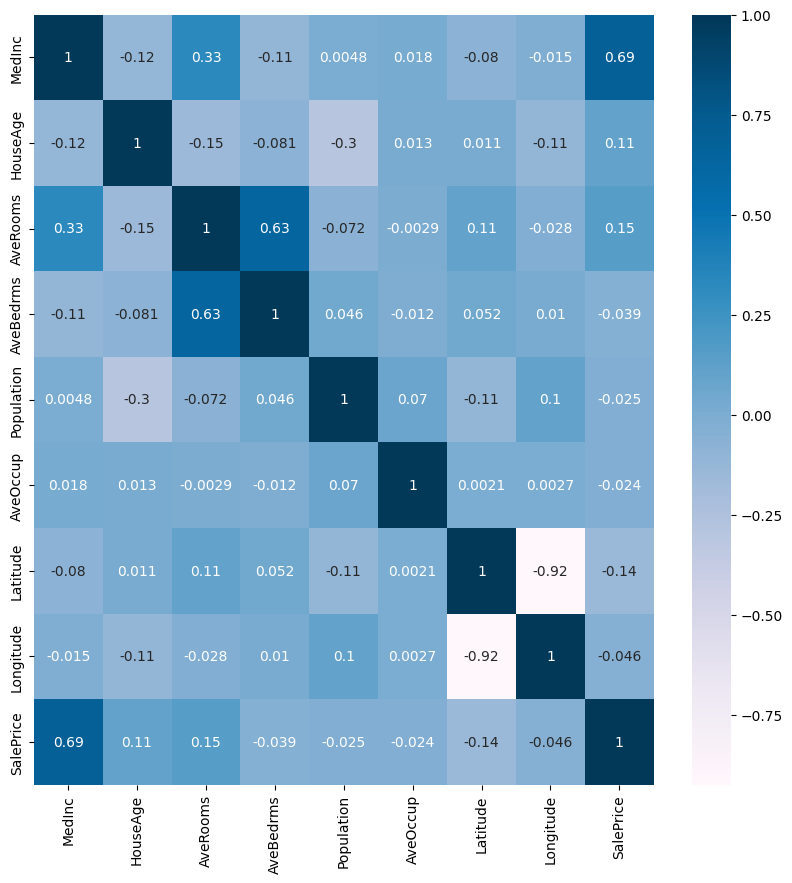

In [ ]:
plt.figure(figsize= (10,10) )
cor =data.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.PuBu)
plt.show()

Training a Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split

X=data.drop("SalePrice",axis=1)                 #Split to independent and dependent variables
y =data["SalePrice"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)                        #Splitting data into training and testing data



In [ ]:
print (X_train.shape)

(16512, 8)


In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [ ]:
predictions =lr.predict(X_test)

print("Actual value  of the house:", y_test)
print("predicted  value  of the house:",  predictions[0] )

Actual value  of the house: 4712     3.550
2151     0.707
15927    2.294
82       1.125
8161     2.254
         ...  
2319     0.682
5341     2.250
16888    3.500
6823     2.273
11878    1.417
Name: SalePrice, Length: 4128, dtype: float64
predicted  value  of the house: 2.163207399598541


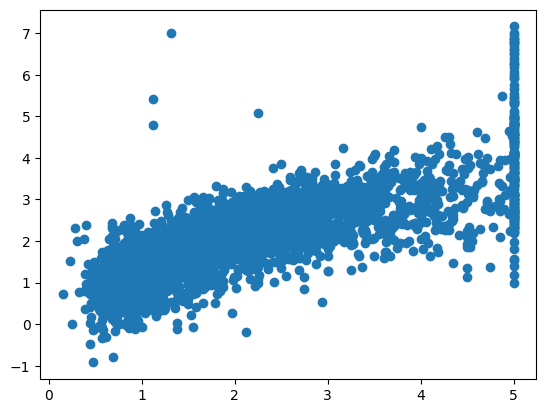

In [ ]:
plt.scatter(y_test,predictions)

**Regression Evaluation Metrics**


1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
2. Mean Squared Error (MSE) is the mean of the squared errors:
3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:




In [ ]:
#Loss function

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5371110477611873
MSE: 0.5317200955787368
RMSE: 0.7291913984536137


In [ ]:
from xgboost import XGBRegressor
model =XGBRegressor()
model.fit(X_train,y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred = model.predict(X_train)

In [ ]:
print(pred)

[2.4234514 1.0402952 1.426176  ... 1.141979  1.2800173 1.194038 ]


In [ ]:
score_1 =metrics.r2_score(y_train,pred)

In [ ]:
score_2 =metrics.mean_absolute_error(y_train,pred)

In [ ]:
print(score_1)
print(score_2)


0.933176047478451
0.20889471913369992


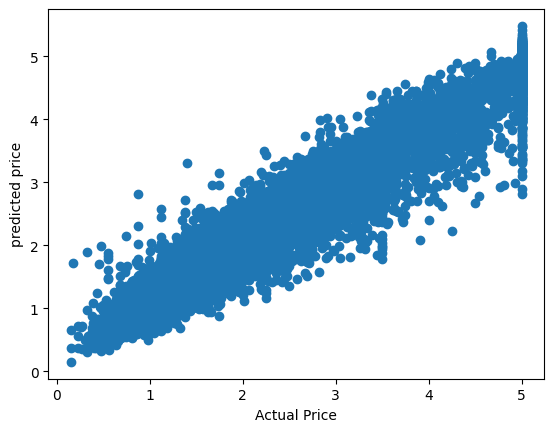

In [ ]:
plt.scatter(y_train,pred)
plt.xlabel("Actual Price")
plt.ylabel("predicted price")
plt.show()


In [ ]:
pred = model.predict(X_test)
score_1 =metrics.r2_score(y_test,pred)
score_2 =metrics.mean_absolute_error(y_test,pred)
print(score_1)
print(score_2)


0.8307409898282274
0.31075204163922016
